In [1]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Convert SQLite to Dataframe

In [2]:
con = sqlite3.connect('../Dataset/hotel-directories-ORI.sqlite3')
df_room = pd.read_sql_query("SELECT * FROM hotel_rooms", con)
df_hotel = pd.read_sql_query("SELECT * FROM hotels", con)

In [3]:
df_room.to_csv('../Dataset/rooms.csv', index=False)
df_hotel.to_csv('../Dataset/hotels.csv', index=False)

In [4]:
df_room.head(2)

,id,hotelId,name,images,roomType,description,originalDescription,bedDescription,size,rate,...,numExtraBeds,numChargedRooms,numRemainingRooms,numBreakfastIncluded,isBreakfastIncluded,isWifiIncluded,isRefundable,hasLivingRoom,extraBedIsIncluded,facilities
0,1000009181,3000020003208,Family,"[""https://ik.imagekit.io/tvlk/generic-asset/dg...",Family,None,None,None,30.0,"{""amount"":""989182"",""currency"":""IDR"",""tax"":""207...",...,0,1,3,NaN,1,1,1,0,0,"[""AIR_CONDITIONING"",""BATHROBES"",""BLACKOUT_DRAP..."
1,1000009219,3000020003208,President Suite,"[""https://ik.imagekit.io/tvlk/generic-asset/dg...",President Suite,None,None,None,75.0,"{""amount"":""3272727"",""currency"":""IDR"",""tax"":""68...",...,0,1,1,NaN,1,1,1,0,0,"[""AIR_CONDITIONING"",""BATHROBES"",""BLACKOUT_DRAP..."


In [5]:
df_hotel.head(2)

,id,type,name,displayName,description,link,address,region,city,province,...,images,facilities,properties,nearestPointOfInterests,starRating,userRating,userRatingInfo,numReviews,latitude,longitude
0,3000020003208,Hotel,Kyriad Hotel Muraya Aceh,Kyriad Hotel Muraya Aceh,<p><b>Lokasi</b><br>Kyriad Hotel Muraya Aceh b...,https://www.traveloka.com/id-id/hotel/detail?s...,Jalan Tengku H. Mohd Daud Beureueuh No. 5 Kuta...,Aceh,Banda Aceh,Aceh,...,"[""https://ik.imagekit.io/tvlk/apr-asset/dgXfoy...","[""CARPARK"",""COFFEE_OR_TEA_IN_LOBBY"",""COFFEE_SH...","{""checkInTime"":""14:00"",""checkOutTime"":""12:00"",...","[{""landmarkId"":""6254734"",""geoId"":null,""name"":""...",4.0,8.6,Mengesankan,1845.0,5.556686,95.322269
1,3000010003879,Hotel,Hermes Palace by BENCOOLEN,Hermes Palace by BENCOOLEN,<p><b>Lokasi</b><br>Hermes Palace by BENCOOLEN...,https://www.traveloka.com/id-id/hotel/detail?s...,Jalan. T. Panglima Nyak Makam Banda Aceh Aceh ...,Aceh,Banda Aceh,Aceh,...,"[""https://ik.imagekit.io/tvlk/apr-asset/dgXfoy...","[""CARPARK"",""COFFEE_SHOP"",""ELEVATOR"",""HAS_24_HO...","{""checkInTime"":""14:00"",""checkOutTime"":""12:00"",...","[{""landmarkId"":""6254734"",""geoId"":null,""name"":""...",5.0,8.4,Mengesankan,2525.0,5.556202,95.344114


## Drop Unnecessary Column

In [6]:
room_drop = ['images', 'description', 'bedDescription', 'originalDescription', 'rate', 'maxOccupancy', 'numRemainingRooms', 'numBreakfastIncluded']
for column_name in room_drop:
    df_room.drop(column_name, axis=1, inplace=True)

df_room.head(2)

,id,hotelId,name,roomType,size,originalRate,baseOccupancy,maxChildOccupancy,maxChildAge,numExtraBeds,numChargedRooms,isBreakfastIncluded,isWifiIncluded,isRefundable,hasLivingRoom,extraBedIsIncluded,facilities
0,1000009181,3000020003208,Family,Family,30.0,"{""amount"":""999174"",""currency"":""IDR"",""tax"":""209...",2,1,10,0,1,1,1,1,0,0,"[""AIR_CONDITIONING"",""BATHROBES"",""BLACKOUT_DRAP..."
1,1000009219,3000020003208,President Suite,President Suite,75.0,"{""amount"":""3305785"",""currency"":""IDR"",""tax"":""69...",2,1,10,0,1,1,1,1,0,0,"[""AIR_CONDITIONING"",""BATHROBES"",""BLACKOUT_DRAP..."


In [7]:
hotel_drop = ['displayName', 'description', 'link', 'address', 'region', 'country', 'geodirectoryId', 'postal', 'image', 'images', 'userRating', 'latitude', 'longitude']
for column_name in hotel_drop:
    df_hotel.drop(column_name, axis=1, inplace=True)

df_hotel.head(2)

,id,type,name,city,province,facilities,properties,nearestPointOfInterests,starRating,userRatingInfo,numReviews
0,3000020003208,Hotel,Kyriad Hotel Muraya Aceh,Banda Aceh,Aceh,"[""CARPARK"",""COFFEE_OR_TEA_IN_LOBBY"",""COFFEE_SH...","{""checkInTime"":""14:00"",""checkOutTime"":""12:00"",...","[{""landmarkId"":""6254734"",""geoId"":null,""name"":""...",4.0,Mengesankan,1845.0
1,3000010003879,Hotel,Hermes Palace by BENCOOLEN,Banda Aceh,Aceh,"[""CARPARK"",""COFFEE_SHOP"",""ELEVATOR"",""HAS_24_HO...","{""checkInTime"":""14:00"",""checkOutTime"":""12:00"",...","[{""landmarkId"":""6254734"",""geoId"":null,""name"":""...",5.0,Mengesankan,2525.0


## Combine Dataset Based on ID

In [8]:
# rename columns

df_hotel.rename(columns={'id': 'hotelId'}, inplace=True)
df_hotel.rename(columns={'name': 'hotelName'}, inplace=True)
df_hotel.rename(columns={'facilities': 'hotelFacilities'}, inplace=True)
df_room.rename(columns={'facilities': 'roomFacilities'}, inplace=True)
df_hotel.head(2)

,hotelId,type,hotelName,city,province,hotelFacilities,properties,nearestPointOfInterests,starRating,userRatingInfo,numReviews
0,3000020003208,Hotel,Kyriad Hotel Muraya Aceh,Banda Aceh,Aceh,"[""CARPARK"",""COFFEE_OR_TEA_IN_LOBBY"",""COFFEE_SH...","{""checkInTime"":""14:00"",""checkOutTime"":""12:00"",...","[{""landmarkId"":""6254734"",""geoId"":null,""name"":""...",4.0,Mengesankan,1845.0
1,3000010003879,Hotel,Hermes Palace by BENCOOLEN,Banda Aceh,Aceh,"[""CARPARK"",""COFFEE_SHOP"",""ELEVATOR"",""HAS_24_HO...","{""checkInTime"":""14:00"",""checkOutTime"":""12:00"",...","[{""landmarkId"":""6254734"",""geoId"":null,""name"":""...",5.0,Mengesankan,2525.0


In [9]:
df = pd.merge(df_hotel, df_room, on='hotelId', how='inner')
df.head(2)

,hotelId,type,hotelName,city,province,hotelFacilities,properties,nearestPointOfInterests,starRating,userRatingInfo,...,maxChildOccupancy,maxChildAge,numExtraBeds,numChargedRooms,isBreakfastIncluded,isWifiIncluded,isRefundable,hasLivingRoom,extraBedIsIncluded,roomFacilities
0,3000020003208,Hotel,Kyriad Hotel Muraya Aceh,Banda Aceh,Aceh,"[""CARPARK"",""COFFEE_OR_TEA_IN_LOBBY"",""COFFEE_SH...","{""checkInTime"":""14:00"",""checkOutTime"":""12:00"",...","[{""landmarkId"":""6254734"",""geoId"":null,""name"":""...",4.0,Mengesankan,...,1,10,0,1,1,1,1,0,0,"[""AIR_CONDITIONING"",""BATHROBES"",""BLACKOUT_DRAP..."
1,3000020003208,Hotel,Kyriad Hotel Muraya Aceh,Banda Aceh,Aceh,"[""CARPARK"",""COFFEE_OR_TEA_IN_LOBBY"",""COFFEE_SH...","{""checkInTime"":""14:00"",""checkOutTime"":""12:00"",...","[{""landmarkId"":""6254734"",""geoId"":null,""name"":""...",4.0,Mengesankan,...,1,10,0,1,1,1,1,0,0,"[""AIR_CONDITIONING"",""BATHROBES"",""BLACKOUT_DRAP..."


### Filter for only Bali Province

In [10]:
df = df[df['province'] == 'Bali']
df.reset_index(drop=True, inplace=True)
df.shape

(7221, 27)

## Data Cleaning

## Feature Selection

### Ecncode Feature from Array

In [11]:
# Rooms facilities processing
# How to use : Facilities = getFacilities(df['Facilities'].tolist())
def getFacilities(facilitiesList):
    facilities = []
    for i in facilitiesList:
        m = int(i.count('"') / 2)
        for j in range(1, m+1, 2):
            temp = i.split('"')[j]
            if temp not in facilities:
                facilities.append(temp)
    return facilities

In [12]:
df.isnull().sum()

hotelId                       0
type                          0
hotelName                     0
city                          0
province                      0
hotelFacilities               0
properties                    0
nearestPointOfInterests       0
starRating                    0
userRatingInfo              653
numReviews                  653
id                            0
name                          0
roomType                      0
size                       2084
originalRate                  0
baseOccupancy                 0
maxChildOccupancy             0
maxChildAge                   0
numExtraBeds                  0
numChargedRooms               0
isBreakfastIncluded           0
isWifiIncluded                0
isRefundable                  0
hasLivingRoom                 0
extraBedIsIncluded            0
roomFacilities                0
dtype: int64

In [13]:
df.duplicated().any()

False

In [14]:
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)
df.shape

(4852, 27)

In [15]:
# Remove underscore and capitalize
def columnName(text):
    index1 = text.find('_')
    index2 = index1 + 1
    index3 = index2 + 1
    text = text[: index1]+ text[index2].swapcase()+text[index3 :]
    finalText = text.strip('_')
    return finalText

In [16]:
# hotel facilites will get error use nameFormatHotel instead
def nameFormat(facilitiesName):
    for i in range (len(facilitiesName)):
        facilitiesName[i] = facilitiesName[i].lower()
        if facilitiesName[i].find('_') > 0:
            while True:
                temp = columnName(facilitiesName[i])
                temporary = temp.isalpha()
                if temporary == False:
                    temp = columnName(facilitiesName[i])
                    facilitiesName[i] = columnName(temp)
                    if facilitiesName[i].isalpha() == True:
                        break
                if temporary == True:
                    facilitiesName[i] = temp
                    break
    return facilitiesName

In [17]:
# only for hotel facilities
def nameFormatHotel(facilitiesName):
    for i in range (len(facilitiesName)):
        facilitiesName[i] = facilitiesName[i].lower()
    return facilitiesName

In [18]:
# Hotel Facilities to List
hotelFacilities = getFacilities(df['hotelFacilities'].tolist())
hotelFacilities[:5]

['CARPARK',
 'ELEVATOR',
 'HAS_24_HOUR_ROOM_SERVICE',
 'RESTAURANT',
 'RESTAURANT_FOR_BREAKFAST']

In [19]:
# Room Facilities to List
roomFacilities = getFacilities(df['roomFacilities'].tolist())
roomFacilities[:5]

['AIR_CONDITIONING',
 'BALCONY_TERRACE',
 'BATHROBES',
 'BATHTUB',
 'BLACKOUT_DRAPES_CURTAINS']

In [20]:
# nearestPointOfInterests to List
# landmarkType is present at indexes [19, 49, 79, 109]

landmark = df['nearestPointOfInterests'].to_list()
searchText = 'landmarkType'
nearestPoint = []
loopCount = 0
for x in range (len(landmark)):
    loopCount += 1
    i = 0
    column = landmark[x].split('"')
    matched_indexes = []
    while i < len(column):
        if searchText == column[i]:
            matched_indexes.append(i)
        i += 1
    for y in matched_indexes:
        if column[y+2] not in nearestPoint:
            nearestPoint.append(column[y+2])

In [21]:
df.loc[0, 'originalRate']

'{"amount":"1227273","currency":"IDR","tax":"257727"}'

In [22]:
# Exstract original rate
for i in range (len(df['originalRate'])):
    df.loc[i, 'originalRate'] = df['originalRate'][i].split('"')[11]
    # df['originalRate'][i] = int(df['originalRate'][i].split('"')[11])
df['originalRate'] = df['originalRate'].astype(int)

In [23]:
# Name formatting and create new dataframe
hotelFacilities = nameFormatHotel(hotelFacilities)
roomFacilities = nameFormat(roomFacilities)
nearestPoint = nameFormat(nearestPoint)

dfHotelEncode = pd.DataFrame(columns=hotelFacilities)
dfRoomEncode = pd.DataFrame(columns=roomFacilities)
dfPointEncode = pd.DataFrame(columns=nearestPoint)

### Point of Interest Correlation

In [24]:
dfPoint = df[['originalRate', 'type', 'city', 'starRating', 'size', 'nearestPointOfInterests', 'baseOccupancy', 'maxChildOccupancy', 'maxChildAge', 'isBreakfastIncluded', 'isWifiIncluded', 'isRefundable', 'hasLivingRoom', ]]
dfEncode = pd.get_dummies(dfPoint['city'], prefix='City')
dfPoint = pd.concat([dfPoint, dfEncode], axis=1)
dfEncode = pd.get_dummies(dfPoint['type'], prefix='Type')
dfPoint = pd.concat([dfPoint, dfEncode], axis=1)
dfPoint.drop(['city', 'type'], axis=1, inplace=True)
dfPoint.reset_index(drop=True, inplace=True)
dfPoint.head(2)

,originalRate,starRating,size,nearestPointOfInterests,baseOccupancy,maxChildOccupancy,maxChildAge,isBreakfastIncluded,isWifiIncluded,isRefundable,...,Type_Apartemen,Type_B&B,Type_Camping,Type_Guest House,Type_Homestay,Type_Hostel,Type_Hotel,Type_Hotel Kapsul,Type_Resor,Type_Vila
0,257727,4.0,46.0,"[{""landmarkId"":""91589773100576"",""geoId"":null,""...",3,1,5,1,1,1,...,0,0,0,0,0,0,1,0,0,0
1,125306,4.0,31.0,"[{""landmarkId"":""91589773100576"",""geoId"":null,""...",2,1,5,0,1,1,...,0,0,0,0,0,0,1,0,0,0


In [25]:
# entering encoded nearetPointOfInterests value
dfPrice = pd.DataFrame(df['originalRate'].tolist())
df_Point = pd.DataFrame(df['nearestPointOfInterests'].tolist())
df_Point = pd.concat([df_Point, dfPointEncode], axis=1)
df_Point.rename(columns={0: 'nearestPointOfInterests'}, inplace=True)
dfPrice.rename(columns={0: 'originalRate'}, inplace=True)
df_Point.head(2)

,nearestPointOfInterests,shoppingArea,officialBuilding,restaurant,attraction,beach,monument,terminal,park,hospital,museum,gallery,placeOfWorship,others,trainStation,zoo,entertainment,garden,theater
0,"[{""landmarkId"":""91589773100576"",""geoId"":null,""...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"[{""landmarkId"":""91589773100576"",""geoId"":null,""...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
for i in range (len(df_Point)):
    index1 = df_Point['nearestPointOfInterests'][i].lower()
    index1 = index1.replace('_', '')
    for j in range (1, len(df_Point.columns)):
        column_name = df_Point.columns[j]
        index2 = df_Point.columns[j].lower()
        if index2 in index1:
            df_Point.loc[i, column_name] = 1
        else:
            df_Point.loc[i, column_name] = 0
df_Point.drop(['nearestPointOfInterests'], axis=1, inplace=True)
df_Point.head()

,shoppingArea,officialBuilding,restaurant,attraction,beach,monument,terminal,park,hospital,museum,gallery,placeOfWorship,others,trainStation,zoo,entertainment,garden,theater
0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [27]:
dfPoint = pd.concat([dfPoint, df_Point], axis=1)

dfPoint.head(3)

,originalRate,starRating,size,nearestPointOfInterests,baseOccupancy,maxChildOccupancy,maxChildAge,isBreakfastIncluded,isWifiIncluded,isRefundable,...,hospital,museum,gallery,placeOfWorship,others,trainStation,zoo,entertainment,garden,theater
0,257727,4.0,46.0,"[{""landmarkId"":""91589773100576"",""geoId"":null,""...",3,1,5,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,125306,4.0,31.0,"[{""landmarkId"":""91589773100576"",""geoId"":null,""...",2,1,5,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,304587,4.0,52.0,"[{""landmarkId"":""91589773100576"",""geoId"":null,""...",2,1,5,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [28]:

dfPoint = dfPoint.astype({'shoppingArea': bool, 'officialBuilding': bool,
       'restaurant': bool, 'attraction': bool, 'beach': bool, 'monument': bool, 'terminal': bool, 'park': bool,
       'hospital': bool, 'museum': bool, 'gallery': bool, 'placeOfWorship': bool, 'others': bool,
       'trainStation': bool, 'zoo': bool, 'entertainment': bool, 'garden': bool, 'theater': bool})

In [29]:
dfPoint = dfPoint.astype({'size': float})

In [30]:
dfPoint.dtypes

originalRate                 int32
starRating                 float64
size                       float64
nearestPointOfInterests     object
baseOccupancy                int64
maxChildOccupancy            int64
maxChildAge                  int64
isBreakfastIncluded          int64
isWifiIncluded               int64
isRefundable                 int64
hasLivingRoom                int64
City_Badung                  uint8
City_Bangli                  uint8
City_Buleleng                uint8
City_Denpasar                uint8
City_Gianyar                 uint8
City_Jembrana                uint8
City_Karangasem              uint8
City_Klungkung               uint8
City_Sanur                   uint8
City_Tabanan                 uint8
Type_Apartemen               uint8
Type_B&B                     uint8
Type_Camping                 uint8
Type_Guest House             uint8
Type_Homestay                uint8
Type_Hostel                  uint8
Type_Hotel                   uint8
Type_Hotel Kapsul   

<function matplotlib.pyplot.show(close=None, block=None)>

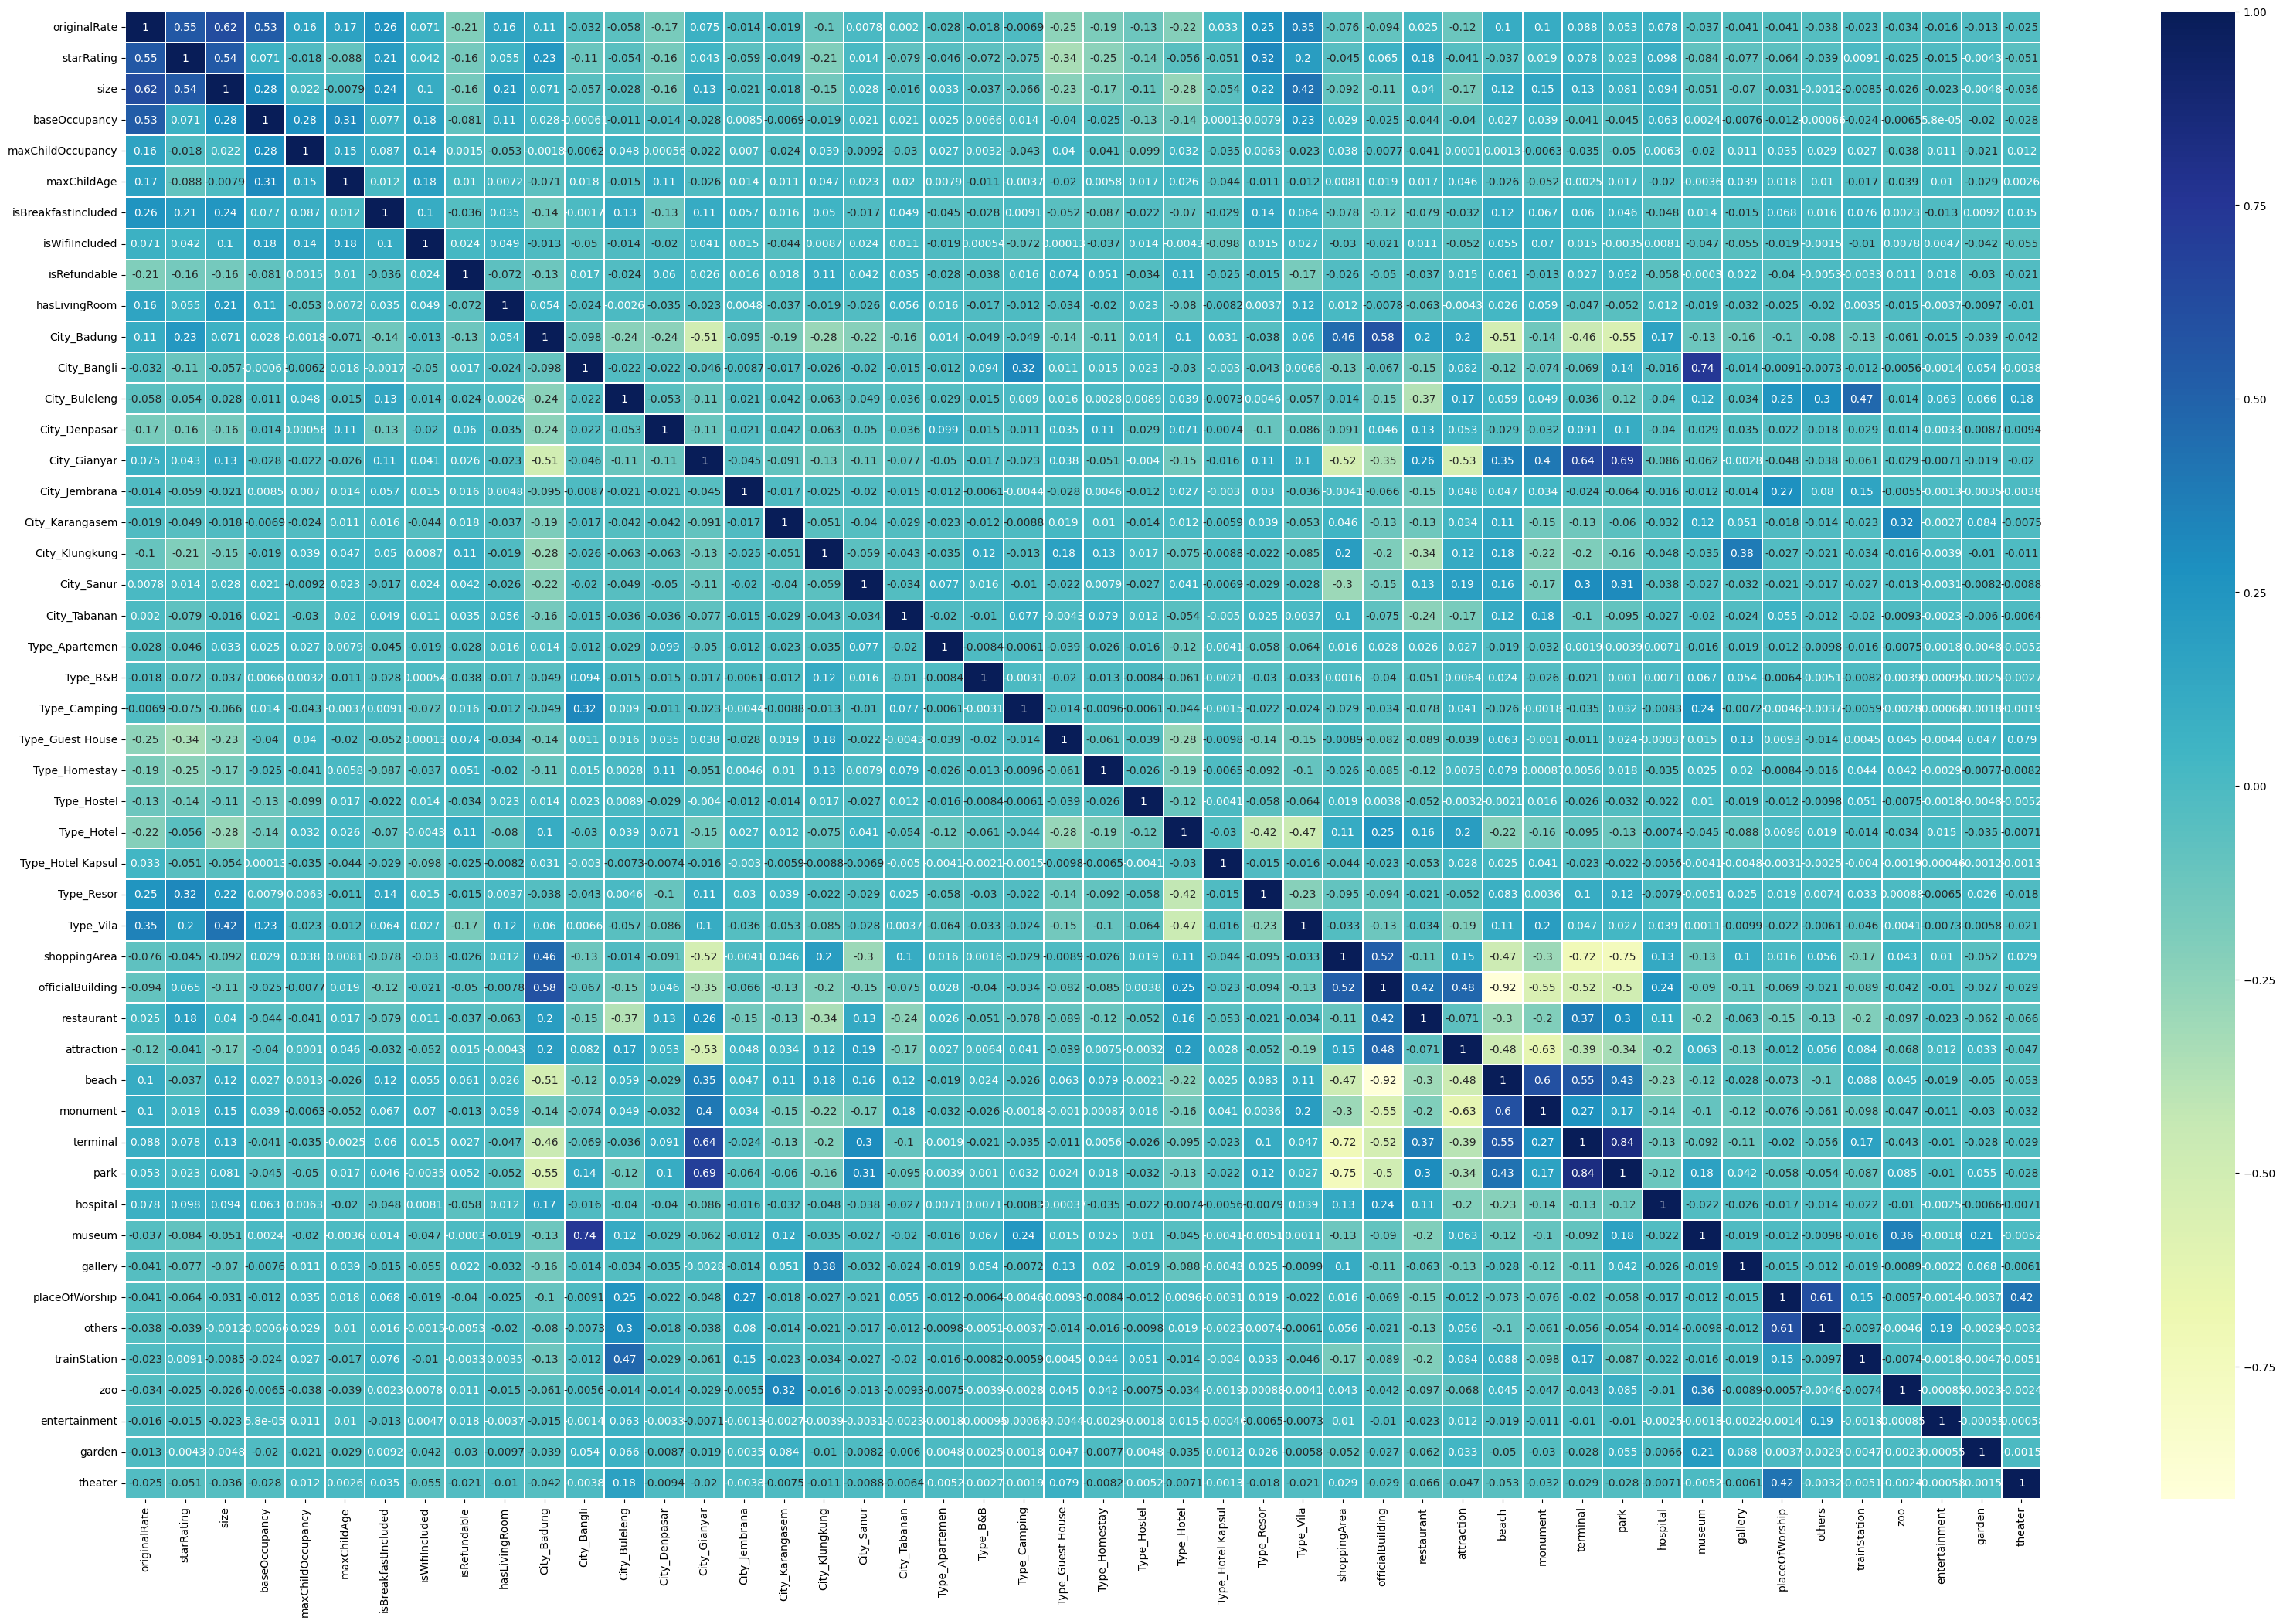

In [31]:
plt.figure(figsize=(40, 25))
sns.heatmap(dfPoint.corr('spearman'), annot=True, cmap='YlGnBu', linewidths=0.2)
plt.show

In [32]:
abs(round(dfPoint.corr('spearman'),2)['originalRate']).sort_values(ascending=False)

originalRate           1.00
size                   0.62
starRating             0.55
baseOccupancy          0.53
Type_Vila              0.35
isBreakfastIncluded    0.26
Type_Guest House       0.25
Type_Resor             0.25
Type_Hotel             0.22
isRefundable           0.21
Type_Homestay          0.19
City_Denpasar          0.17
maxChildAge            0.17
maxChildOccupancy      0.16
hasLivingRoom          0.16
Type_Hostel            0.13
attraction             0.12
City_Badung            0.11
City_Klungkung         0.10
monument               0.10
beach                  0.10
officialBuilding       0.09
terminal               0.09
City_Gianyar           0.08
hospital               0.08
shoppingArea           0.08
isWifiIncluded         0.07
City_Buleleng          0.06
park                   0.05
placeOfWorship         0.04
others                 0.04
museum                 0.04
gallery                0.04
zoo                    0.03
City_Bangli            0.03
Type_Hotel Kapsul   

In [33]:
dfPoint.columns

Index(['originalRate', 'starRating', 'size', 'nearestPointOfInterests',
       'baseOccupancy', 'maxChildOccupancy', 'maxChildAge',
       'isBreakfastIncluded', 'isWifiIncluded', 'isRefundable',
       'hasLivingRoom', 'City_Badung', 'City_Bangli', 'City_Buleleng',
       'City_Denpasar', 'City_Gianyar', 'City_Jembrana', 'City_Karangasem',
       'City_Klungkung', 'City_Sanur', 'City_Tabanan', 'Type_Apartemen',
       'Type_B&B', 'Type_Camping', 'Type_Guest House', 'Type_Homestay',
       'Type_Hostel', 'Type_Hotel', 'Type_Hotel Kapsul', 'Type_Resor',
       'Type_Vila', 'shoppingArea', 'officialBuilding', 'restaurant',
       'attraction', 'beach', 'monument', 'terminal', 'park', 'hospital',
       'museum', 'gallery', 'placeOfWorship', 'others', 'trainStation', 'zoo',
       'entertainment', 'garden', 'theater'],
      dtype='object')

In [34]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split
import xgboost as xgb


dfPoint = dfPoint.drop('nearestPointOfInterests', axis=1)
X = dfPoint.drop('originalRate', axis=1)
y = dfPoint['originalRate']
select = SelectKBest(score_func=f_regression, k=5)
X_new = select.fit_transform(X, y)
x_train, x_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)
xgb_r = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1, n_estimators = 10, max_depth = 5)
xgb_r.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.3,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=10, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [35]:
# X_new.get_feature_names_out()

In [36]:
# X_new.feature_names_in_

In [37]:
# for i in range (len(X_new.scores_)):
#     print(X_new.feature_names_in_[i],round( X_new.scores_[i],2))

In [38]:
from sklearn.metrics import mean_squared_error

pred = xgb_r.predict(x_test)
rmse = np.sqrt(mean_squared_error(y_test, pred))
print("RMSE : % f" %(rmse))

RMSE :  634269.627414


#### dfPoint (Feature with Correlation > 0.5)
baseOccupancy          0.73 </br>
maxChildAge            0.55

### Hotel Feature Correlation

In [39]:
dfHotel = df[['originalRate', 'hotelFacilities',  'isBreakfastIncluded', 'isWifiIncluded', 'isRefundable', 'hasLivingRoom', ]]